# Завдання 1

## Вправа 1. 

Зайти на сайт "yahoo finance" i завантажити 4 серiї цiн на акцiї: **Ford Motor Company (F), The Boeing Company (BA), Virgin Galactic Holdings, Inc. (SPCE), Intel Corporation (INTC)** (щоденнi за
рiк i щотижневi за два роки). 

Задачі:
- Знайти очiкувану ефективнiсть (дохiднiсть) i волатильнiсть ефективностi кожного активу. 
- Побудуйте графiк емпiричної та пiдiгнаної нормальної щiльностi для дохiдностi кожного активу. 

Для кожноого типу акції (для кожної компанії) існує два файли (щотижневий за 2 роки та щоденний за рік). Отже, маємо 8 файлів, експортованих в форматі .csv. з "yahoo finance"

Назви файлів сформовані за наступним принципом: абревіатура акції + _ + Daily_Y/Weekly_2Y (для щоденного за рік та щотижневого за два відповідно) + .csv

Для початку експортуємо бібліотеки для роботи з даними за допомогою Python:

In [1]:
import pandas as pd
import numpy as np

Прочитаємо таблиці, експортовані з сайту (формат назви пояснено вище):

In [2]:
# абревіатури акцій
stocks_abbrs = ['F', 'BA', 'SPCE', 'INTC']

# частота розбиття - Daily_Y/Weekly_2Y
frequencies = ['Daily_Y', 'Weekly_2Y']

# прочитання даних
stocks = []

for abbr in stocks_abbrs:
    for frequency in frequencies:
        current_stock_data = pd.read_csv(str(abbr)+"_"+str(frequency)+".csv")
        stocks.append(current_stock_data)
        
# stocks[0] -> Ford stocks daily
# stocks[1] -> Ford stocks weekly
# stocks[2] -> Boeing stocks daily
# ...

Розглянемо вигляд (перші 5 записів) для акцій Ford для кожного дня:

In [3]:
stocks[0].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,11.38,11.59,11.13,11.47,10.432888,66198300
1,2022-10-04,11.96,12.37,11.94,12.36,11.242414,87629200
2,2022-10-05,12.38,12.56,12.13,12.51,11.378852,87919100
3,2022-10-06,12.36,12.63,12.19,12.36,11.242414,64531900
4,2022-10-07,12.18,12.30,12.00,12.20,11.096881,56494500


Як видно, ми маємо значення ціни акції станом на певну дату (**Open** - вартість при відкритті ринку на початку розглянутого періоду, **High** - найвища за період, **Low** - найменша за період ціна, **Close** ціна на час закриття ринку тощо). Окрім того, тут є дата (для тижневої частоти - одна на тиждень) та кількість акцій (**Volume**).

Оскільки, необхідно розглядати одне значення ціни акції ($S_t$) для кожного періоду. Візьмемо як $S_t$ - середнє між **High** та **Low**.

$$S_t = \frac{(S_{High} + S_{Low})}{2}$$

In [4]:
# застосуємо цю формулу та видалимо Open, High, Low, Adj Close, Volume, Close - як непотрібні колонки 
# (залишимо винятково часовий ряд ціни)
for stock in stocks:
    stock['Stock Price'] = (stock['High']+ stock['Low'])/2
    stock.drop(columns = ['Low', 'High', 'Close', 'Open', 'Volume', 'Adj Close'], inplace = True)

На прикладі акції Ford, отримаємо: 

In [5]:
# перші 5 записів
stocks[0].head()

,Date,Stock Price
0,2022-10-03,11.360
1,2022-10-04,12.155
2,2022-10-05,12.345
3,2022-10-06,12.410
4,2022-10-07,12.150


### 1. Розрахунок ефективності

Підрахунок ефективності ведеться за наступною формулою:

$$R_t = \frac{S_t - S_{t-1}}{S_t}$$

Впровадимо її на оброблені вище часові ряди:

In [6]:
for stock in stocks:
    stock['Previous Stock Price'] = stock['Stock Price'].shift(1)
    stock['R'] = (stock['Stock Price'] - stock['Previous Stock Price'])/stock['Stock Price']
    stock.drop(columns = ['Previous Stock Price'], inplace = True)

In [7]:
# результат на прикладі Ford - розрахунок R - ефективності
stocks[0].head()

,Date,Stock Price,R
0,2022-10-03,11.360,NaN
1,2022-10-04,12.155,0.065405
2,2022-10-05,12.345,0.015391
3,2022-10-06,12.410,0.005238
4,2022-10-07,12.150,-0.021399


### 2. Очікувана ефективність 

Очікувана ефективність - це просто математичне сподівання від ефективності.
Найкращою оцінкою математичного сподівання є середнє арифметичне і чим більше записів - тим ближче до математичного сподівання (за законом великих чисел).

Очікувана ефективінсть:

$$E(R_t) \approx \frac{(R_1+R_2 + ... +R_t)}{t}$$

In [8]:
# список значень очікуваної ефективності, визначених на основі всієї історії акції (8 варіантів - залежно від акції та частоти):
effectivities = []

for stock in stocks:
    effectivity = stock['R'].mean()
    effectivities.append(effectivity)    

In [9]:
i = 0
for abbr in stocks_abbrs:
    for frequency in ['щоденно, 1 рік історії', 'щотижнево, 2 роки історії']:
        print("Очікувана ефективність для активу {} ({}): {}".format(abbr, frequency, round(effectivities[i], 6)))
        i+=1

Очікувана ефективність для активу F (щоденно, 1 рік історії): 0.000105
Очікувана ефективність для активу F (щотижнево, 2 роки історії): -0.003038
Очікувана ефективність для активу BA (щоденно, 1 рік історії): 0.00156
Очікувана ефективність для активу BA (щотижнево, 2 роки історії): -0.00261
Очікувана ефективність для активу SPCE (щоденно, 1 рік історії): -0.005073
Очікувана ефективність для активу SPCE (щотижнево, 2 роки історії): -0.028783
Очікувана ефективність для активу INTC (щоденно, 1 рік історії): 0.000911
Очікувана ефективність для активу INTC (щотижнево, 2 роки історії): -0.00484


### 3. Волатильність ефективності 

Волатильність ефективності визначається за формулою:
    
$$\sigma  = \sqrt{E(R_t^2) - E(R_t)^2}$$

Для підрахунку на всій історії зручно буде визначити допоміжну колонку **D_t**:

$$D_t = R_t^2$$

In [10]:
for stock in stocks:
    stock['D'] = stock['R']**2

In [11]:
# результат на прикладі
stocks[0].head()

,Date,Stock Price,R,D
0,2022-10-03,11.360,NaN,NaN
1,2022-10-04,12.155,0.065405,0.004278
2,2022-10-05,12.345,0.015391,0.000237
3,2022-10-06,12.410,0.005238,0.000027
4,2022-10-07,12.150,-0.021399,0.000458


Тепер знаходимо значення волатильності для всіх акцій:


In [12]:
sigmas = []

for stock in stocks:
    sigma = np.sqrt(stock['D'].mean() - stock['R'].mean()**2)
    sigmas.append(sigma)

In [13]:
i = 0
for abbr in stocks_abbrs:
    for frequency in ['щоденно, 1 рік історії', 'щотижнево, 2 роки історії']:
        print("Волатильність ефективності для активу {} ({}): {}".format(abbr, frequency, round(sigmas[i], 6)))
        i+=1

Волатильність ефективності для активу F (щоденно, 1 рік історії): 0.021262
Волатильність ефективності для активу F (щотижнево, 2 роки історії): 0.052467
Волатильність ефективності для активу BA (щоденно, 1 рік історії): 0.016475
Волатильність ефективності для активу BA (щотижнево, 2 роки історії): 0.045209
Волатильність ефективності для активу SPCE (щоденно, 1 рік історії): 0.046892
Волатильність ефективності для активу SPCE (щотижнево, 2 роки історії): 0.090119
Волатильність ефективності для активу INTC (щоденно, 1 рік історії): 0.021491
Волатильність ефективності для активу INTC (щотижнево, 2 роки історії): 0.039664


### 4. Побудова емпіричної та підігнаної щільностей

Спершу імпортуємо бібліотеку для візуалізації (matplotlib, seaborn) для побудови графіків розподілу за завданням

In [14]:
# модулі для візуалізації
import seaborn as sns
import matplotlib.pyplot as plt

# вимкнення повідомлень 
import warnings
warnings.filterwarnings("ignore")

Власне, сама побудова та побудовані графіки (нижче):

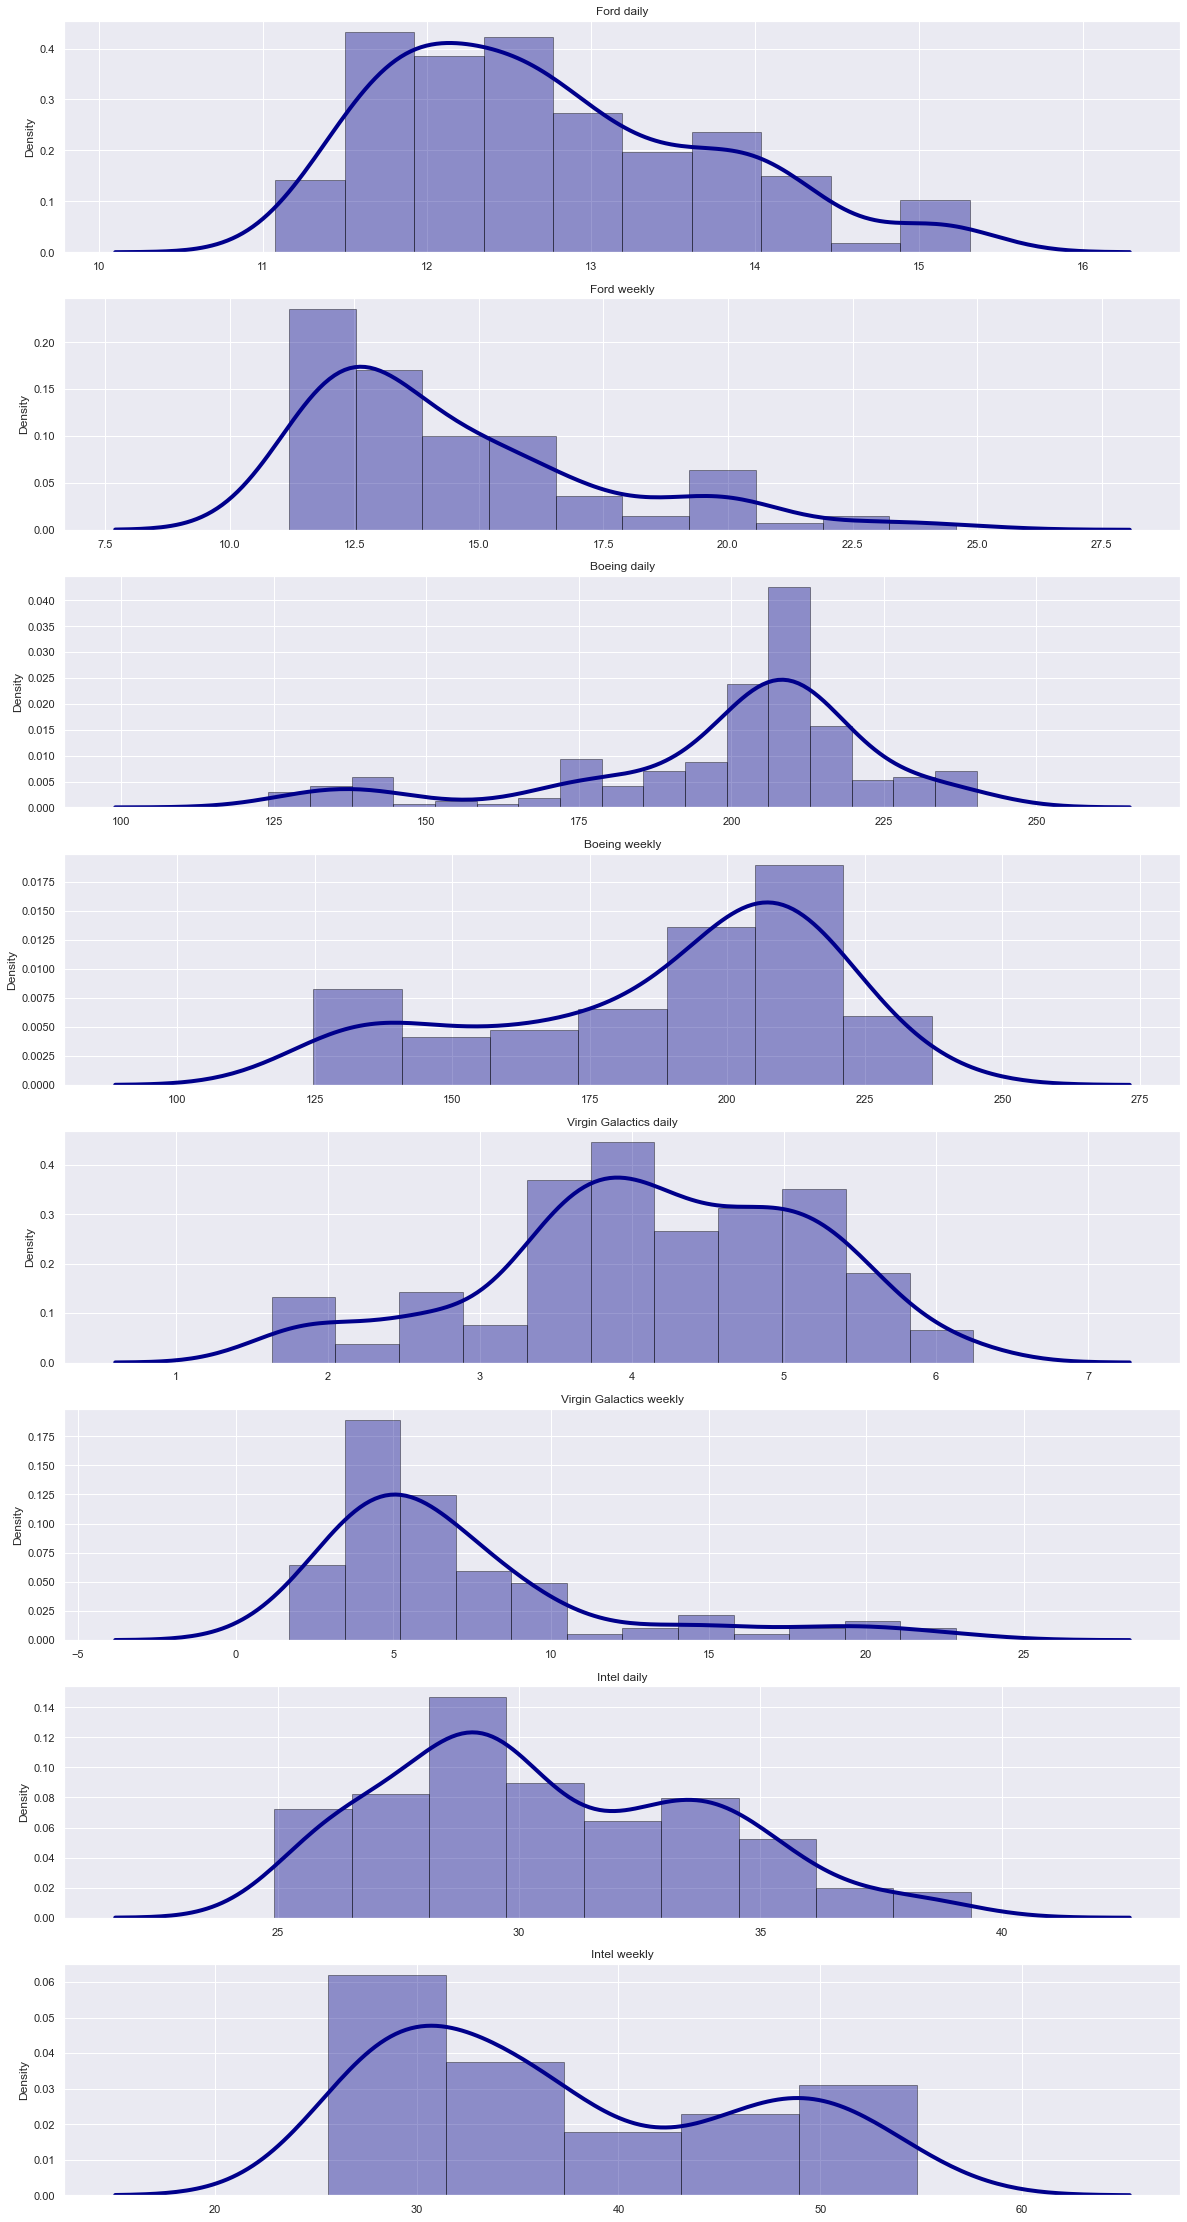

In [16]:
fig, axes = plt.subplots(8)
sns.set(rc={'figure.figsize':(50,90)})

titles = ['Ford daily', 'Ford weekly', 'Boeing daily', 'Boeing weekly', 
          'Virgin Galactics daily', 'Virgin Galactics weekly', 'Intel daily', 'Intel weekly']
i=0
for stock in stocks:
    data = np.array(stock['Stock Price'])
    
    sns.distplot(data, ax=axes[i],  hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    axes[i].set_title(titles[i])
    i+=1




## Вправа 2
Для кожного з чотирьох активiв у вправi 1 знайдiть вартiсть пiд ризиком на 99 % та 95 %

Згідно з формулою: 
   
$$VaR_\alpha(X) := \inf{(m ∈ R : P(X + m < 0) ≤ α)}.$$

У цій формулі: $\alpha = 0.99 $ (99 %) та $\alpha = 0.95$ (95 %) відповідно

Варто зазначити, що $X$ - визначимо як прибуток/втрата за один період квантування (день або тиждень залежно від часового ряду).

$$X_t = S_t -S_{t-1}$$

У таблиці позначимо цю величину як **Income**.

Допоміжна величина - $L = - X$ - втрата (loss).

Задача передбачає знаходження квантиля при певному рівні $\alpha$. Тобто знаходження розв'язку $F_L(m) = P(L<m) \geq 1- \alpha, L = -X$

Отже, іншими словами, VaR позначає ту суму, вище якої з певною довірчою ймовірністю ($1 - \alpha$) не втратиш. Відповідно, за день/тиждень втрата складатиме менше VaR у більшості випадків.

Зрозуміло, що чим більше період, який розглядається, тим більша невизначеність і тим більшою буде значення під ризиком.

In [45]:
# створимо колонку для прибутку X
for stock in stocks:
    stock['Income'] = stock['Stock Price'] - stock['Stock Price'].shift(1)
    
    #видалимо перше значення - для нього немає передісторії
    stock.dropna(inplace = True)

In [47]:
# тепер знаходимо VaR для усіх акцій при різних alpha = 95/99 %
for alpha in [0.95, 0.99]:
    i=0
    for stock in stocks:
        # маючи alpha знайдемо відповідний мінімальний m - VaR
        var = - np.percentile(stock['Income'], 100 - alpha*100)
        print("Значення VaR для  alpha = " +str(alpha) + ", для  активу " + titles[i] + " : "+ str(round(var, 4)))
        i+=1

Значення VaR для  alpha = 0.95, для  активу Ford daily : 0.4482
Значення VaR для  alpha = 0.95, для  активу Ford weekly : 1.4502
Значення VaR для  alpha = 0.95, для  активу Boeing daily : 4.386
Значення VaR для  alpha = 0.95, для  активу Boeing weekly : 16.2187
Значення VaR для  alpha = 0.95, для  активу Virgin Galactics daily : 0.3269
Значення VaR для  alpha = 0.95, для  активу Virgin Galactics weekly : 1.3354
Значення VaR для  alpha = 0.95, для  активу Intel daily : 0.9438
Значення VaR для  alpha = 0.95, для  активу Intel weekly : 2.2163
Значення VaR для  alpha = 0.99, для  активу Ford daily : 0.753
Значення VaR для  alpha = 0.99, для  активу Ford weekly : 1.7379
Значення VaR для  alpha = 0.99, для  активу Boeing daily : 8.1876
Значення VaR для  alpha = 0.99, для  активу Boeing weekly : 22.0383
Значення VaR для  alpha = 0.99, для  активу Virgin Galactics daily : 0.4647
Значення VaR для  alpha = 0.99, для  активу Virgin Galactics weekly : 2.0935
Значення VaR для  alpha = 0.99, для  ак